In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style('dark')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<h3>Read Data and discover its info</h3>

In [104]:
# Read Data
data = pd.read_csv('data/weatherAUS.csv')

# Show first 5 Rows from data.
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [105]:
# Check data dimensions.
# We have 145460 records with 22 independent variables and one dependent variable (RainTomorrow).
data.shape

(145460, 23)

In [106]:
#Check if data attributes have any NA values
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [107]:
# From the previous cell we can see that we have alot of NA values in dataset.
# And we have NA values in the dependent variable itself, so we need to remove this records from data.
data = data[data['RainTomorrow'].notna()]
data.shape

(142193, 23)

In [108]:
# Check percenatage of NA values in data attributes.
data.isnull().sum()/len(data)*100

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64

In [109]:
# From previous cell we can see that Evaporation, Sunshine, Cloud9am and Cloud3pm
# have almost 50% of thier record missing which can have negative effect on our model.
data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [110]:
numericCols = data.select_dtypes(include=["float64","int64"]).columns     # Numerical data attributes --> 12 Features
categoricalCols = data.select_dtypes(include="object").columns  # Categorical daata attributes --> 7 Features

# We can notice that we have Categorical data less than numerical.
print(numericCols)
print(categoricalCols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [111]:
# Check number of unique values in each categorical attribute to see if we can convert them into numerical.
# Only Date and Location attribute has many different values 3436 and 49 respectivly.
# But we can ignore Location column because it's implicitly defined by the other whether features, and doesn't give new info.
# The same is for Date each date entry is given by day-month-year which is implicitly defined by the other whether features.
for col in categoricalCols:
    print(f"{col}: {data[col].nunique()}")

# Remove flight column
data.drop(['Date','Location'],axis=1,inplace=True)

Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


In [112]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


<h3>Visualize Data and Correlations</h3>

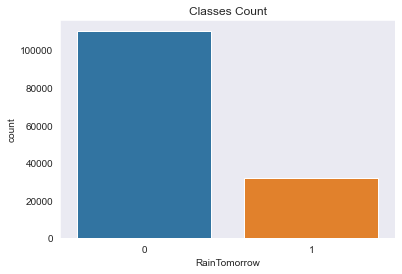

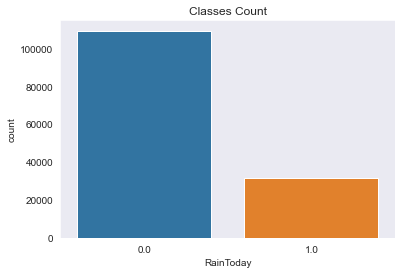

In [127]:
# See counts of each class for RainTomorrow in dataset.
plt.figure()
plt.subplot()
plt.title("Classes Count")
sns.countplot(x='RainTomorrow',data=data)
plt.show()
# We can see that data is unbalanced so maybe we need to do resampling.

# See counts of each class for RainToday in dataset.
plt.figure()
plt.subplot()
plt.title("Classes Count")
sns.countplot(x='RainToday',data=data)
plt.show()
# We can notice that RainTomorrow and RainToday has the same histogram, so maybe they affect each other.


In [114]:
# Convert Raintomorrow and RainToday attributes into numericals.
data['RainTomorrow'].replace(['No', 'Yes'],[0, 1], inplace=True)
data['RainToday'].replace(['No', 'Yes'],[0, 1], inplace=True)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


<AxesSubplot:>

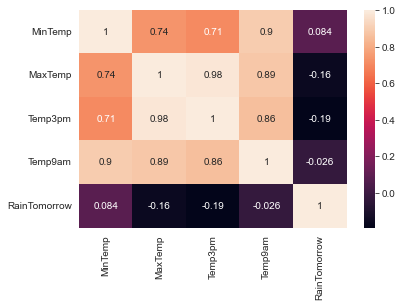

In [115]:
# Now lets analyze how temp. affect the probability of raining tomorrow.
# We have in our data 4 sources for temp (MaxTemp, MinTemp, Temp9am, Temp3pm)
# Lets how these values affect our target.
sns.heatmap(data[['MinTemp','MaxTemp','Temp3pm','Temp9am', 'RainTomorrow']].corr(), annot=True)

<AxesSubplot:>

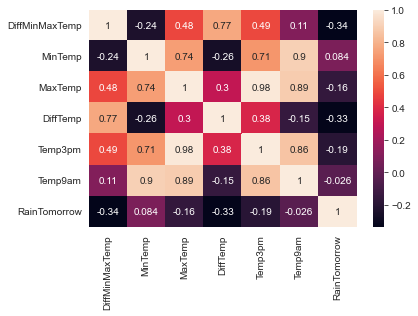

In [116]:
# After seeing the correlation matrix we can notice that these variables are not affect our target variable too much.
# But we can extract useful information from it by taking difference between the temps. 
data['DiffMinMaxTemp'] = data['MaxTemp'] - data['MinTemp']
data['DiffTemp'] = data['Temp3pm'] - data['Temp9am']
data[['DiffMinMaxTemp','MinTemp','MaxTemp','DiffTemp','Temp3pm','Temp9am', 'RainTomorrow']].corr()
sns.heatmap(data[['DiffMinMaxTemp','MinTemp','MaxTemp','DiffTemp','Temp3pm','Temp9am', 'RainTomorrow']].corr(), annot=True)


In [117]:
# Now we can see that we converted the unuseful variable to be more useful and more correlated to our target.
# Lets drop old variables
data.drop(['MinTemp','MaxTemp','Temp3pm','Temp9am'],axis=1,inplace=True)
data.head()

,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,DiffMinMaxTemp,DiffTemp
0,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0,9.5,4.9
1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0,17.7,7.1
2,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0,12.8,2.2
3,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0,18.8,8.4
4,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0,14.8,11.9


<AxesSubplot:>

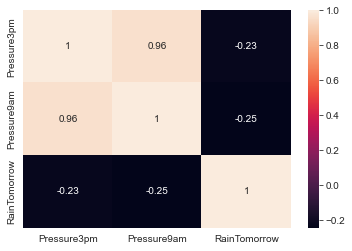

In [131]:
# Now lets analyze how the pressure affect the probability of raining tomorrow.
# We have in our data 2 sources for temp (Pressure3pm, Pressure9am)
# Lets how these values affect our target.
sns.heatmap(data[['Pressure3pm','Pressure9am', 'RainTomorrow']].corr(), annot=True)




In [120]:
# Lets see if Rainfall affect our target value or not.
data[['Rainfall', 'RainTomorrow']].corr()
sns.scatterplot(x=data.index, y=data['Rainfall'], hue=data['RainTomorrow'])


,Rainfall,RainTomorrow
Rainfall,1.000000,0.239032
RainTomorrow,0.239032,1.000000


In [118]:
# Lets see if RainToday affect our target value or not.
data[['RainToday', 'RainTomorrow']].corr()


,RainToday,RainTomorrow
RainToday,1.000000,0.313097
RainTomorrow,0.313097,1.000000


In [119]:
# Now fill the ramaining NA values in dataset by -100 value.
# data.fillna(-100,inplace=True)
# data.head()